<a href="https://colab.research.google.com/github/Sparkashok/Machine-Learning/blob/main/ML_CLusteringSingleLinkage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

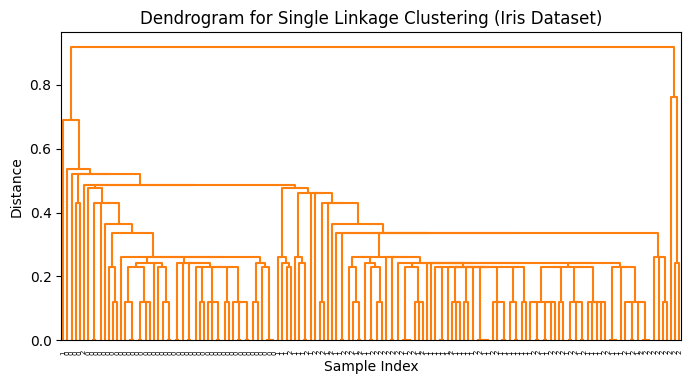

Clusters at threshold 0.3: [ 5  5  5  5  5  3  5  5  4  5  5  5  5  4  8 21  3  5  7  5  5  5  6  5
  5  5  5  5  5  5  5  5  1  2  5  5  5  5  4  5  5 22  5  5  5  5  5  5
  5  5 13 13 13 13 13 13 13  9 13 17 23 13 10 13 13 13 13 13 10 13 19 13
 12 13 13 13 15 13 13 13 13 13 13 13 13 13 13 10 13 13 13 13 13  9 13 13
 13 13  9 13 13 13 14 13 13 11  9 14 20 25 13 13 13 13 13 13 13 24 18 10
 13 13 16 13 13 13 13 13 13 14 14 24 13 13 13 11 13 13 13 13 13 13 13 13
 13 13 12 13 13 13]
Clusters at threshold 0.5: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2
 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2
 2 2 2 2 2 2 6 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Clusters at threshold 1.0: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 

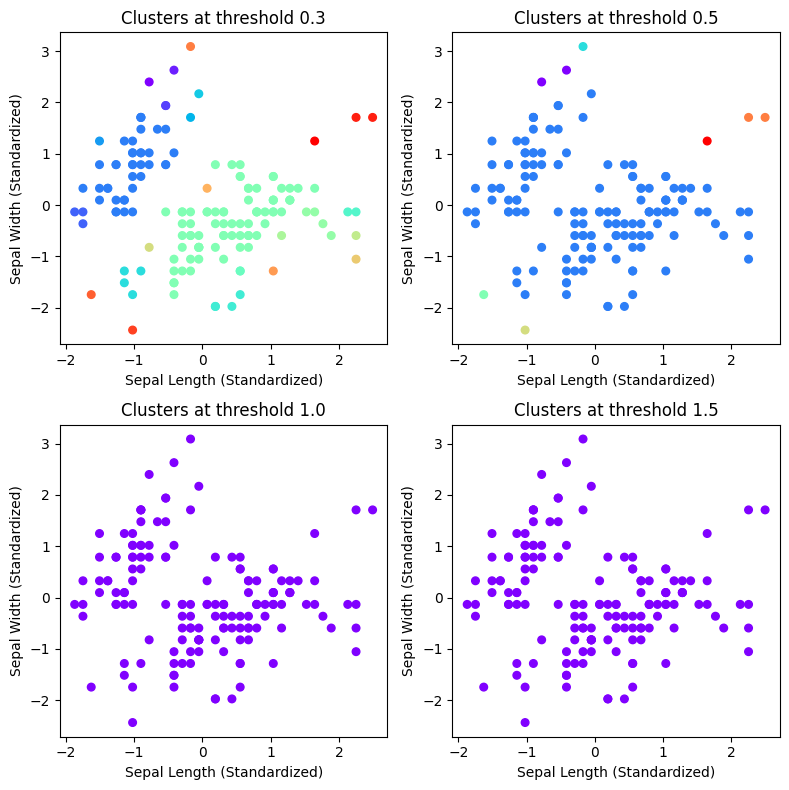

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width) for easy visualization

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform single linkage clustering
Z = linkage(X_scaled, method='single')

# Plot the dendrogram with a smaller figure size
plt.figure(figsize=(8, 4))  # Smaller figure size
dendrogram(Z, labels=iris.target, color_threshold=1)
plt.title("Dendrogram for Single Linkage Clustering (Iris Dataset)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Show clusters at different levels by setting different distance thresholds
for threshold in [0.3, 0.5, 1.0, 1.5]:
    clusters = fcluster(Z, threshold, criterion='distance')
    print(f"Clusters at threshold {threshold}: {clusters}")

# Visualize the clusters at different levels with smaller subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  # Smaller subplots
thresholds = [0.3, 0.5, 1.0, 1.5]
axes = axes.ravel()

for i, threshold in enumerate(thresholds):
    clusters = fcluster(Z, threshold, criterion='distance')
    axes[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow', s=30)  # Smaller points
    axes[i].set_title(f"Clusters at threshold {threshold}")
    axes[i].set_xlabel("Sepal Length (Standardized)")
    axes[i].set_ylabel("Sepal Width (Standardized)")

plt.tight_layout()
plt.show()
